## part 1

In [2]:
#A
import pandas as pd
import sklearn


Sklearn, which stands for Scikit-learn is a open source library which using mainly for machine learning and data
science in Python.
It's built upon the technology of other libraries like NumPy, pandas, and Matplotlib.
Sklearn contains tools like statistical modeling including classification, regression, clustering and dimensionality reduction.


In [3]:
#B
def read_data_from_csv_file(file_name):
    return pd.read_csv(file_name)
ex2_data = read_data_from_csv_file ("covid_19_clustring.csv")

In [6]:
#C+D
rows,cols = ex2_data.shape
print ("There are ",rows,"rows.")
print ("There are ",cols, "cols.")

There are  3041 rows.
There are  9 cols.


In [46]:
#E
#print(ex2_data.columns)
print("The number of districts in USA in the data is:", (len(set(ex2_data["state"]))))

The number of districts in USA in the data is: 56


# part 2

In [222]:
# 3
#print(ex2_data.columns)
#print (ex2_data)
#print ("The categoric variable is", ex2_data.columns[1] )

# 3
The categorical variable is: state

In [243]:
# 4
#print ("the numerics variables are:")
#for i in ex2_data.columns:
 #  if  i !=  ex2_data.columns[1]:
  #      print (i)


the numerics variables are:
date
positive
negative
hospitalizedCurrently
recovered
death
hospitalized
total


# 4
The numerics variables are:date, positive, negative, hospitalizedCurrently,
recovered, death, hospitalized, total.

In [63]:
# 5
print ("The average number of deaths per day in US is", ex2_data[["date","death"]].groupby(["date"]).sum().mean())

The average number of deaths per day in US is death    8120.438776
dtype: float64


In [115]:
# 6
highest_sicks= ex2_data[ex2_data["positive"]== ex2_data["positive"].max()]['state']
max_positive_country = (max_positive.to_string()[-2:])
print('The state with the highest number of positive covid_19 sicks is:',(max_positive_country))


The state with the highest number of positive covid_19 sicks is: NY


In [218]:
# 7
max_state = ex2_data[["state",'positive','negative']].groupby(["state"]).max()
state_list = max_state[(max_state["positive"] >5000) & (max_state["negative"]>5000)]
print("The states with over 5000 positive and negative for covid_19 are:",'\n',
      state_list)

The states with over 5000 positive and negative for covid_19 are: 
        positive  negative
state                    
AL       6687.0   69140.0
AZ       6948.0   60490.0
CA      45031.0  532577.0
CO      13879.0   52462.0
CT      26312.0   66433.0
FL      32846.0  334029.0
GA      24615.0  115405.0
IA       6376.0   33447.0
IL      48102.0  194087.0
IN      16588.0   70593.0
LA      27286.0  123822.0
MA      58302.0  196198.0
MD      20113.0   87672.0
MI      39262.0  125543.0
MO       7303.0   66200.0
MS       6342.0   58070.0
NC       9568.0  103184.0
NJ     113856.0  120503.0
NY     295106.0  549888.0
OH      16128.0  106578.0
PA      43264.0  165824.0
RI       7926.0   49767.0
SC       5613.0   46532.0
TN      10052.0  151876.0
TX      26171.0  274213.0
VA      13794.0   68959.0
WA      13686.0  165993.0
WI       6289.0   63535.0


In [190]:
# 8
std_usa = ex2_data[["date","recovered"]].groupby(["date"]).sum().std()
print("the standard diviation in USA for", std_usa)


the standard diviation in USA for recovered    26187.493705
dtype: float64


##### 
according to the fact that the standard diviation of the recovered is 26187 we can conclude that the variance is pretty high and the virus effects diffrently on  different segments/ages

if the standard diviation was lower we could have conclude that the virus is effecting almost the same on differnt populations


Text(0, 0.5, 'recovered')

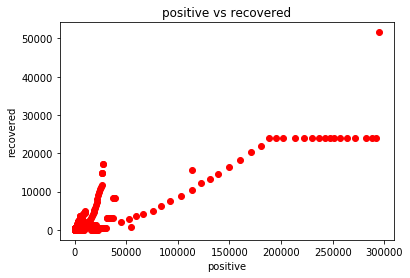

In [4]:
# 9
import matplotlib as mp
import matplotlib.pyplot as plt

plt.scatter (x=ex2_data["positive"], y=ex2_data["recovered"],c="red" )
plt.title ("positive vs recovered")
plt.xlabel ("positive")
plt.ylabel ("recovered")

we can see that as long as the number of positive for covid_19 is relativly low the number of recovered as a liner connection to the number of the positive.
when the number of the positives is close to 200000 the slop of the number of the recovered is getting smaller.
we can assume that it is happening because there's a specific number of patients that the hospitals can take care of.

# part 3

In [5]:
# 10
ex2_data.fillna(ex2_data.mean(),inplace = True)
#ex2_data.isna().sum()

In [6]:
# 11
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(ex2_data["state"])
ex2_data["state"] = labelEncoder.transform(ex2_data['state'])
#print (ex2_data["state"])

In [7]:
# 12
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_normalize = pd.DataFrame(scaler.fit_transform(ex2_data))
#print (X_normalize)

# Part 4

In [10]:
# 13
from sklearn.cluster import KMeans
def create_kmeans_classifier(k):
    if k >=1  and k%1 == 0:
        return KMeans(n_clusters = k)


In [14]:
# 14+15+16
from sklearn.metrics import silhouette_score
k_Range = range(2,16)
norm_score = []
data_score = []
centroeid = []
for i in (k_Range): #14
    train_data = create_kmeans_classifier(i).fit_predict(ex2_data)
    train_norm = create_kmeans_classifier(i).fit_predict(X_normalize)
    norm_centroeid = create_kmeans_classifier(i).fit(X_normalize)
    norm_score.append(silhouette_score(X_normalize,train_norm)) #15
    data_score.append(silhouette_score(ex2_data,train_data)) #16
    centroeid.append(norm_centroeid.cluster_centers_)
#print (norm_score, "  ", data_score)

#print (centroeid)

In [334]:
#17
if len(norm_score) == len(data_score) & len(norm_score) ==14:
    print ("There are 14 K's in each list", "\n")
print ("Norm list:","\n" ,norm_score,"\n", "Data list:","\n", data_score)

There are 14 K's in each list 

Norm list: 
 [0.41539747546672123, 0.43095774396750186, 0.4070440777412199, 0.41613831087848596, 0.4273333729211229, 0.43542326484701566, 0.45289414015275237, 0.4599541978787393, 0.4499736444002245, 0.45980799492053626, 0.4429084272240886, 0.42312946310833605, 0.4503367868607287, 0.4523114212661443] 
 Data list: 
 [0.8353567488287343, 0.791808485787439, 0.691909948661198, 0.6783325419805292, 0.6739059666347814, 0.6410773208287947, 0.6443848060258726, 0.5749484745535065, 0.5738527841524365, 0.5737478884284273, 0.5763621562343957, 0.6326815292995643, 0.6305839706792582, 0.627631420988179]


# part 5

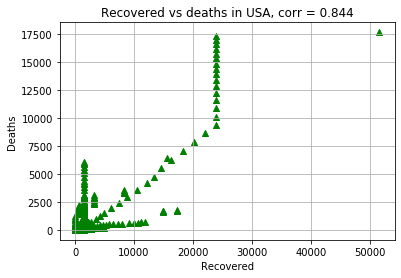

In [390]:
# 18
cor = ex2_data["recovered"].corr( ex2_data["death"])
#print (round(cor, 3))
plt.scatter (x= ex2_data["recovered"],y= ex2_data["death"],c="green",marker ="^")
plt.title ("Recovered vs deaths in USA, corr = 0.844")
plt.xlabel ("Recovered")
plt.ylabel ("Deaths")
plt.grid()

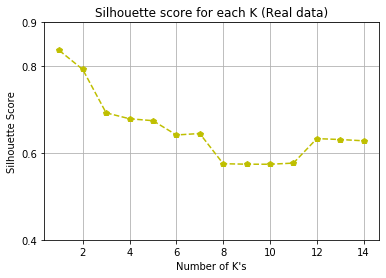

In [470]:
# 19
yticks = [0.4,0.6,0.8,0.9]
plt.plot(range(1,15),data_score,"yp--")
plt.title("Silhouette score for each K (Real data)")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of K's")
plt.yticks (yticks)
plt.grid()


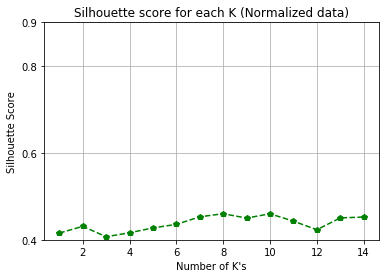

In [471]:
# 20
plt.plot(range(1,15),norm_score,"gp--")
plt.title("Silhouette score for each K (Normalized data)")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of K's")
plt.yticks (ticks)
plt.grid()


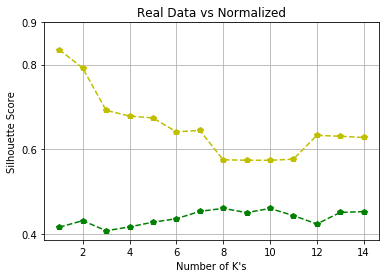

In [472]:
# 20- visualization for myself not part of the assignment 
plt.plot (range(1,15),norm_score,"gp--",range(1,15),data_score,"yp--")
plt.title ("Real Data vs Normalized")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of K's")
plt.yticks (ticks)
plt.grid()


#20 

as we can see from the two grahps, the normalization of the data making the silhouette's score much lower for each k.
on the other hand, when we are normalizing the data the socres for the k's are more similar to each other and we can compere the groups in this data for differnt k's from the origianl data.  

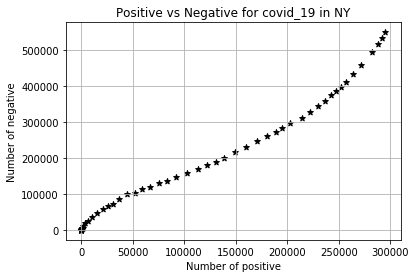

In [481]:
#21
highest_rec_state = ex2_data.loc[ex2_data.state==ex2_data.groupby('state').sum().idxmax(axis=0)['recovered']]
plt.scatter (x= highest_rec_state["positive"],y=highest_rec_state['negative'],c="black",marker ="*") 
plt.title ('Positive vs Negative for covid_19 in NY')
plt.xlabel ("Number of positive")
plt.ylabel ("Number of negative")
plt.grid()

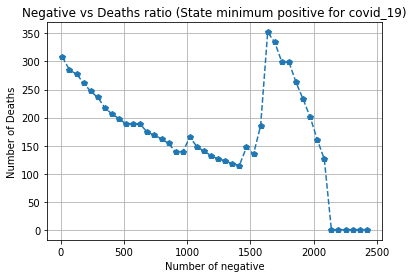

In [53]:
# 22

min_pos_state = ex2_data.loc[ex2_data.state==ex2_data.groupby('state').sum().idxmin(axis=0)['recovered']]

plt.plot ( (min_pos_state["negative"]) / (min_pos_state['death']),"p--")
plt.title ('Negative vs Deaths ratio (State minimum positive for covid_19)')
plt.xlabel ("Number of negative")
plt.ylabel ("Number of Deaths")
plt.grid()

# part 6

In [25]:
#1 
 
list1= [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

df1 = pd.DataFrame([list1, data_score],
                  index = ['K','Score'],
                  columns = list1)
df1.to_excel("Silhouette_rates_{}.xlsx")  

df2 = pd.DataFrame([list1, norm_score],
                  index = ['K','Score'],
                  columns = list1)
df2.to_excel("Silhouette_rates_normalized .xlsx")  

In [27]:
## 2
ex2_data.to_excel("data_{}.xlsx")
X_normalize.to_excel("dataa_normalized.xlsx")

In [34]:
# 3
import xlwt
book1 = xlwt.Workbook()
sheet1 = book1.add_sheet('cent_score',cell_overwrite_ok =True)
c = 0 
r =2 

for i in norm_score:
    sheet1.write (0,c,label =r)
    r = r+1
    c = c +1 
for i in range(len(centroeid)):
    for j in range(len(centroeid[i])):
        sheet1.write(j+1,i,label =','.join(cent))
        

book1.save("centroids.xls")